In [1]:
#必要なライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
#winequality-redを読み込み
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#qualityの中身、それぞれの数確認
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

今回は、簡単にするためqualityが3と8のものだけ考える

In [5]:
data = data[((data["quality"] == 3) | (data["quality"] == 8))]
data["quality"].value_counts()

8    18
3    10
Name: quality, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 267 to 1549
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         28 non-null     float64
 1   volatile acidity      28 non-null     float64
 2   citric acid           28 non-null     float64
 3   residual sugar        28 non-null     float64
 4   chlorides             28 non-null     float64
 5   free sulfur dioxide   28 non-null     float64
 6   total sulfur dioxide  28 non-null     float64
 7   density               28 non-null     float64
 8   pH                    28 non-null     float64
 9   sulphates             28 non-null     float64
 10  alcohol               28 non-null     float64
 11  quality               28 non-null     int64  
dtypes: float64(11), int64(1)
memory usage: 2.8 KB


In [7]:
# sns.pairplot(data);

In [8]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.341869,0.823366,0.227019,0.099468,-0.158852,-0.276089,0.725330,-0.742853,0.012538,-0.334340,0.051166
volatile acidity,-0.341869,1.000000,-0.699617,0.092648,0.292103,-0.213337,-0.129026,0.036793,0.560436,-0.694873,-0.232389,-0.710050
citric acid,0.823366,-0.699617,1.000000,0.095429,-0.118314,-0.104642,-0.124607,0.436046,-0.764744,0.370276,-0.028639,0.447726
residual sugar,0.227019,0.092648,0.095429,1.000000,-0.144357,-0.366247,-0.369399,0.414477,0.004336,-0.104407,0.173237,-0.021342
chlorides,0.099468,0.292103,-0.118314,-0.144357,1.000000,-0.000722,-0.214724,0.214820,-0.045742,-0.365546,-0.480154,-0.556782
free sulfur dioxide,-0.158852,-0.213337,-0.104642,-0.366247,-0.000722,1.000000,0.734156,-0.362510,0.055214,0.112313,0.233196,0.105318
total sulfur dioxide,-0.276089,-0.129026,-0.124607,-0.369399,-0.214724,0.734156,1.000000,-0.431682,0.162350,0.204563,0.325189,0.182999
density,0.725330,0.036793,0.436046,0.414477,0.214820,-0.362510,-0.431682,1.000000,-0.365374,-0.176666,-0.649647,-0.444714
pH,-0.742853,0.560436,-0.764744,0.004336,-0.045742,0.055214,0.162350,-0.365374,1.000000,-0.209348,0.261123,-0.334766
sulphates,0.012538,-0.694873,0.370276,-0.104407,-0.365546,0.112313,0.204563,-0.176666,-0.209348,1.000000,0.300577,0.641121


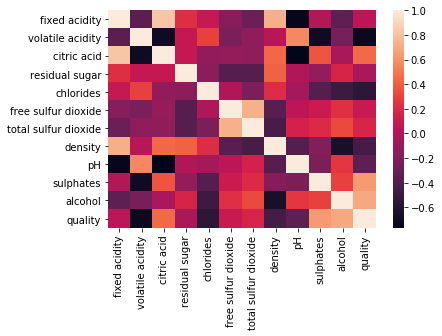

In [9]:
sns.heatmap(data.corr());

今回は簡単にするため、説明変数には"volatile acidity"と"alcohol"だけ残す。この2つを残す理由は以下
- "quality"との相関係数の絶対値が高い
- 説明変数同士の相関係数が低い

In [10]:
data= data[["volatile acidity", "alcohol", "quality"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 267 to 1549
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  28 non-null     float64
 1   alcohol           28 non-null     float64
 2   quality           28 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 896.0 bytes


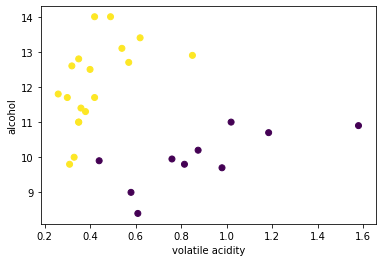

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data["volatile acidity"], data["alcohol"], c=data["quality"])
ax.set_xlabel("volatile acidity")
ax.set_ylabel("alcohol");

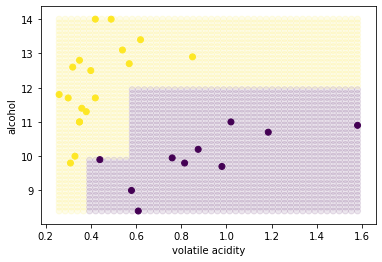

In [12]:
xy = data[["volatile acidity", "alcohol"]]
z = data["quality"]

#ロジスティックス回帰のモデル
model = DecisionTreeClassifier(max_depth=3)
model.fit(xy, z)

x_min, x_max = data["volatile acidity"].min(), data["volatile acidity"].max()
y_min, y_max = data["alcohol"].min(), data["alcohol"].max()

x_mesh, y_mesh = np.meshgrid(np.linspace(x_min, x_max, 50),
                             np.linspace(y_min, y_max, 50))
xy_mesh = np.c_[x_mesh.reshape(-1, 1), y_mesh.reshape(-1, 1)]

#メッシュ毎にラベル予測(3 or 8)
z_pred = model.predict(xy_mesh)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xy_mesh[:, 0], xy_mesh[:, 1], c=z_pred, alpha=0.1)
ax.scatter(data["volatile acidity"], data["alcohol"], c=data["quality"])
ax.set_xlabel("volatile acidity")
ax.set_ylabel("alcohol");

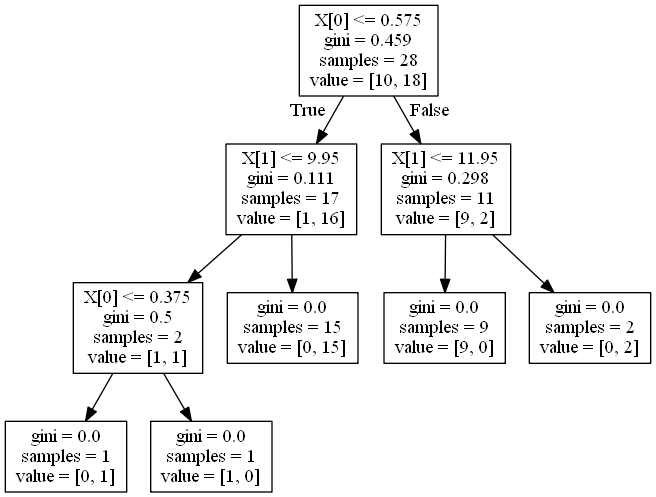

In [14]:
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())